In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("/content/Salary Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
print(df.shape)
df.head()

(30, 2)


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [ ]:
print(df.columns)
print(df.index)
df.dtypes


Index(['YearsExperience', 'Salary'], dtype='object')
RangeIndex(start=0, stop=30, step=1)


YearsExperience    float64
Salary             float64
dtype: object

<Figure size 3000x1500 with 0 Axes>

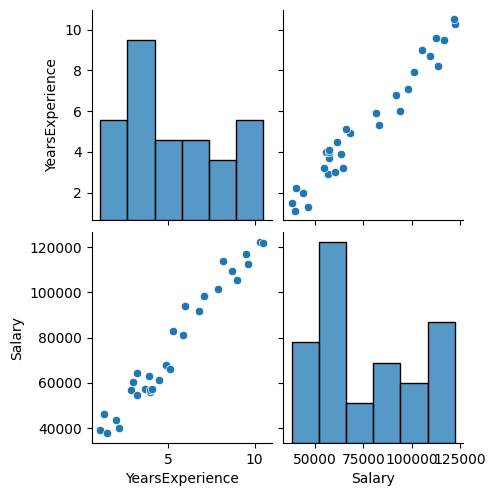

In [ ]:
plt.figure(figsize=(30,15))
sns.pairplot(df)
plt.show()

In [ ]:
X=df[["YearsExperience"]]
y=df["Salary"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=1)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(22, 1)
(22,)
(8, 1)
(8,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
print("intercept =",lr.intercept_)
print("coefficent =",lr.coef_)

intercept = 25892.305719071228
coefficent = [9261.56845302]


In [ ]:
y_pred=lr.predict(X_test)
y_pred

array([ 74978.61852009,  91649.44173553,  62012.42268586,  81461.7164372 ,
        67569.36375767,  88870.97119962, 113877.20602278,  44415.44262512])

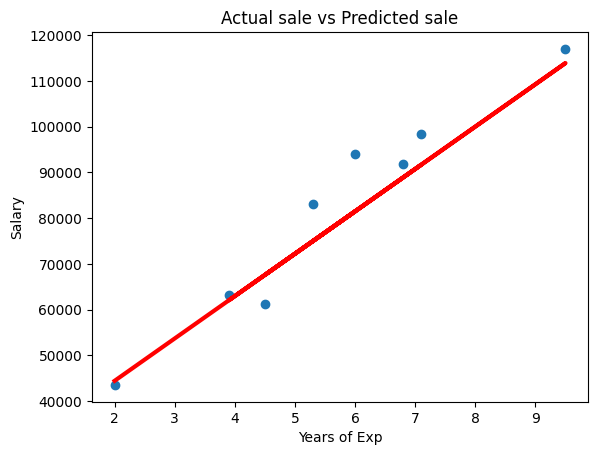

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=X_test,y=y_test)
plt.plot(X_test,y_pred,color="red",linewidth=3)
plt.title("Actual sale vs Predicted sale")
plt.xlabel("Years of Exp")
plt.ylabel("Salary")
plt.show()

In [ ]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,y_pred))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,y_pred))
print("R-squared value of predictions:",metrics.r2_score(y_test,y_pred))

Mean absolute error (MAE): 5215.553722712969
Mean square error (MSE): 40884620.50478402
R-squared value of predictions: 0.9180980074804029


In [ ]:
df_check = pd.DataFrame({'Actual': y_test[:10].values, 'Predicted': y_pred[:10].ravel()})
df_check

,Actual,Predicted
0,83088.0,74978.618520
1,98273.0,91649.441736
2,63218.0,62012.422686
3,93940.0,81461.716437
4,61111.0,67569.363758
5,91738.0,88870.971200
6,116969.0,113877.206023
7,43525.0,44415.442625


Text(9.444444444444445, 0.5, 'count')

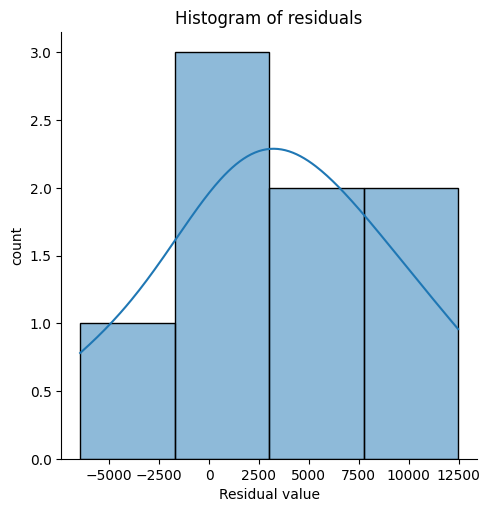

In [ ]:
import seaborn as sns
resids = np.subtract(y_test, y_pred)

sns.displot(resids, kde = True)
plt.title('Histogram of residuals')
plt.xlabel('Residual value')
plt.ylabel('count')